# DA 623 Tutorial

Topic 31) Visualize the spectrum (and spectrogram, separately) of computed from 2 secs utterances corresponding to a few phonemes of a 
spoken language (Japanese) of your choice.

In [13]:
# Importing necessary libraries
import os
import numpy as np
import librosa                               #Python package for analysing audio
import librosa.display
import matplotlib.pyplot as plt              #Python package for visulising plots

In [14]:
# Load the audio file
cwd = os.getcwd()
audio_path = cwd + '\Japanese_Phonemes'
phoneme_list = []
phoneme_name = []

for filename in os.listdir(audio_path):
    file_path = os.path.join(audio_path, filename)
    audio_data, sample_rate = librosa.load(file_path, duration=2.0)
    phoneme_list.append([audio_data, sample_rate])
    phoneme_name.append(filename.split('.')[0])
print(phoneme_name)

['a', 'na', 'ni', 'o', 'shi', 'tsu', 'u']


A sound spectrum is a representation of an audio signal that comprises of the information about the frequencies and their magnitudes. They are 2D graphs with x-axis as the frequencies and the y-axis as their corresponding magnitude. For visualising the sound spectrum of the phonemes, we will compute the discrete fourier transform of the audio signal. Here, the DFT if computed using np.fft.fft() which is a fast fourier transform algorithm.

In [15]:
#Computing the Spectrum (Discrete Fourier Transform) of the phoneme
fft = []
frequencies = []
for i in range(0,len(phoneme_name)):
    fft.append(np.fft.fft(phoneme_list[i][0]))
    frequencies.append(np.fft.fftfreq(len(fft[i]), 1/phoneme_list[i][1]))

magnitude_spectrum = np.abs(fft)


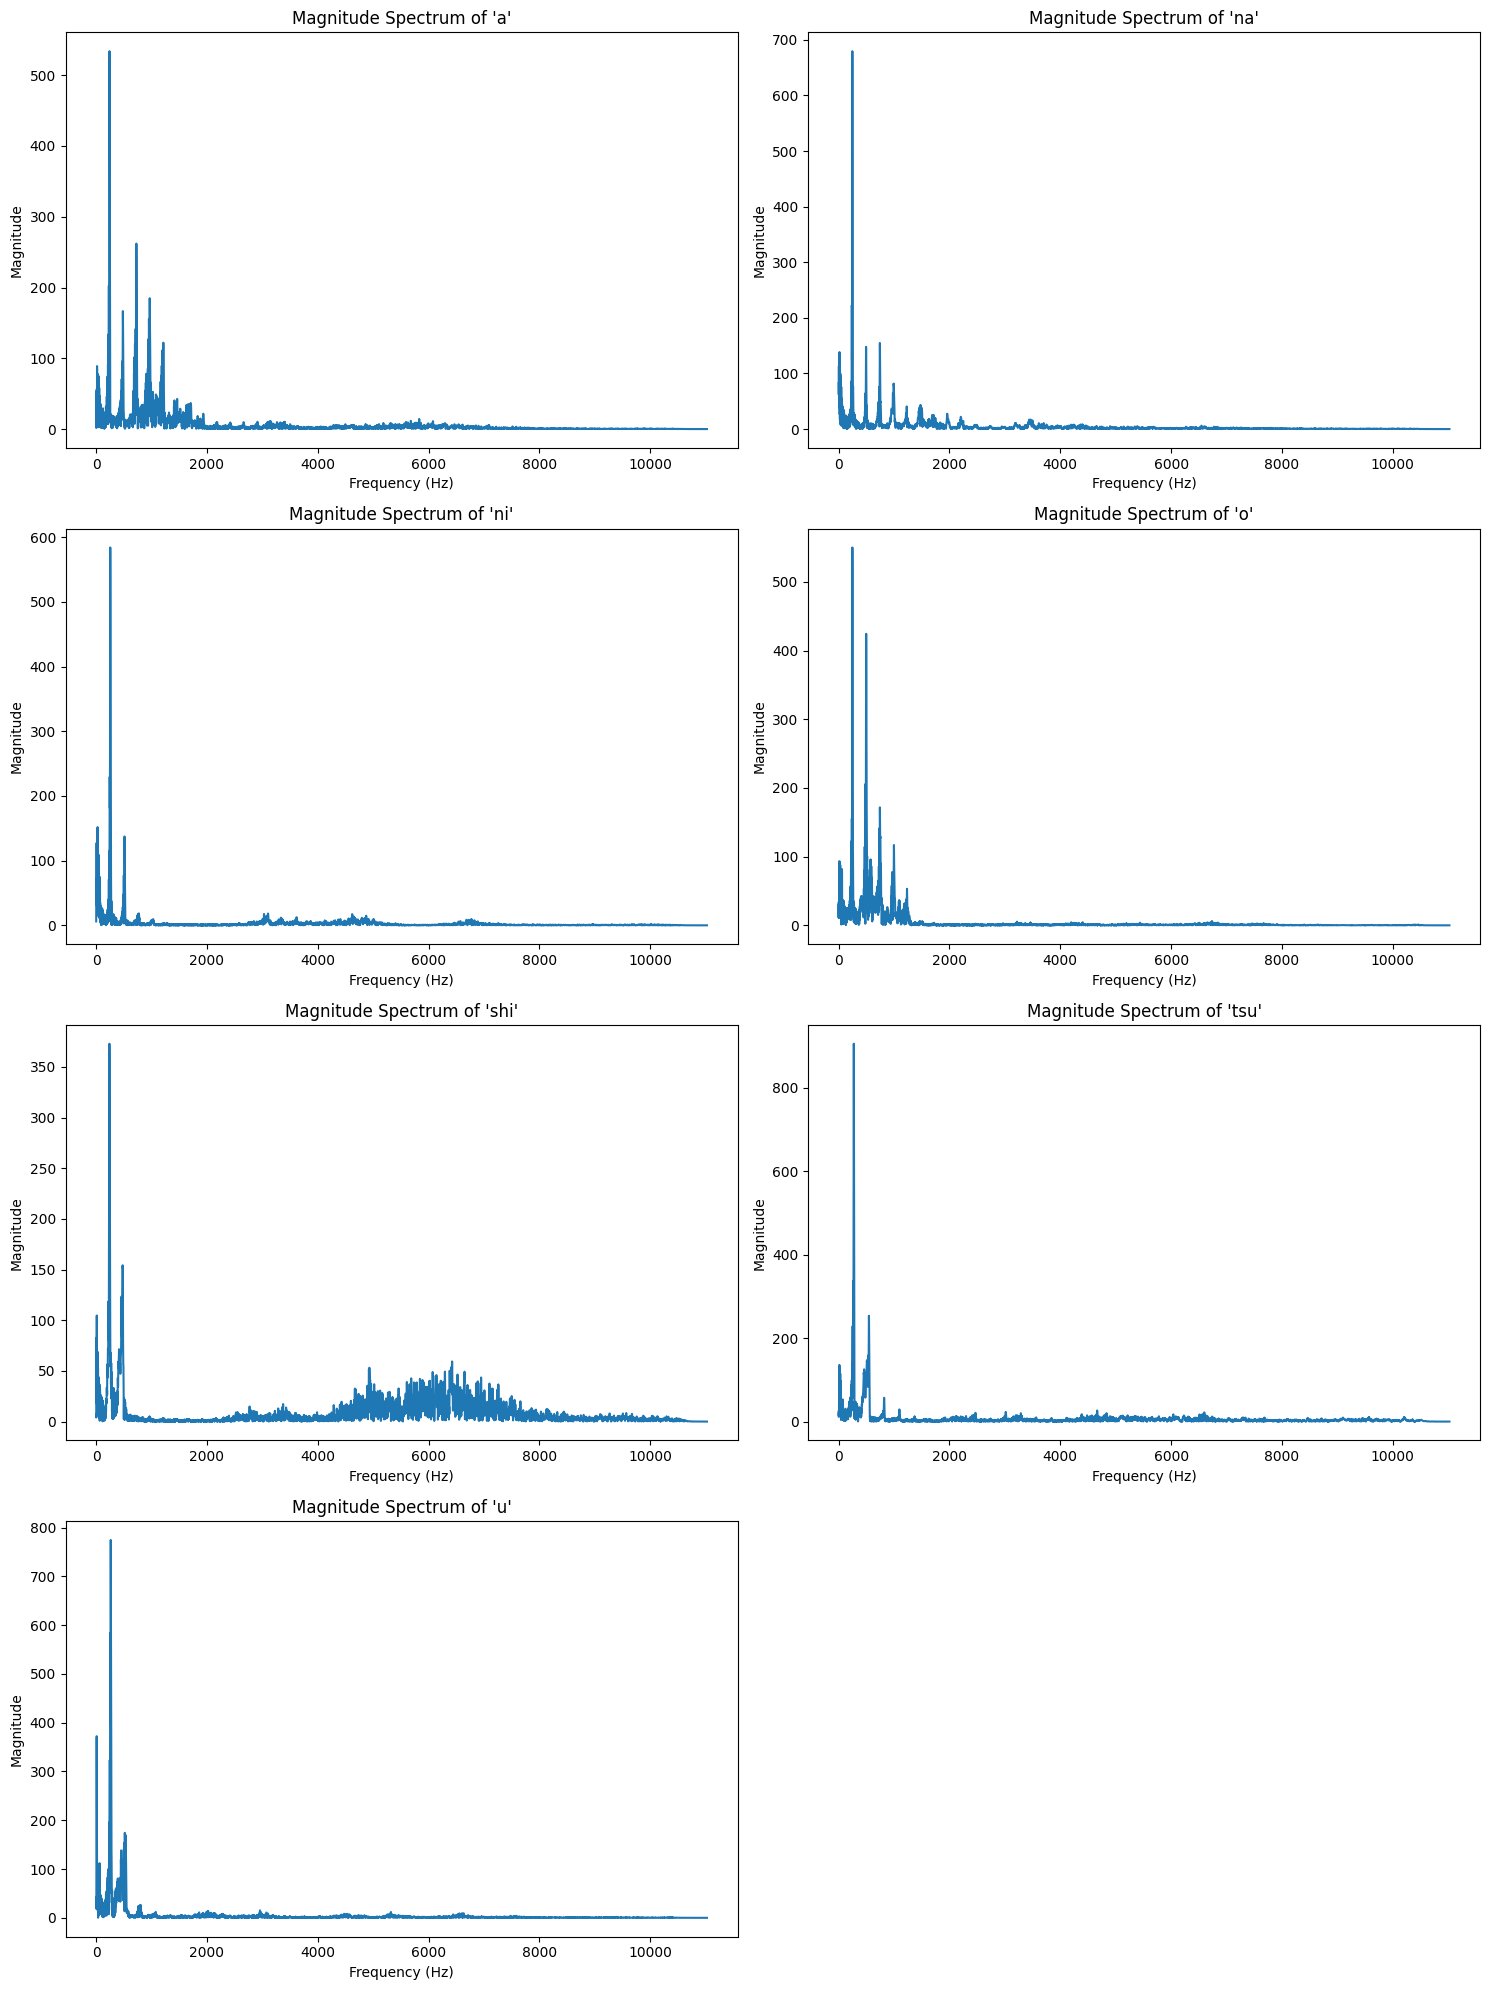

In [16]:
#Plotting the Spectrum
fig, axs = plt.subplots(4,2, figsize = (15,20))
fig.delaxes(axs[3,1])
for i in range(0,len(phoneme_name)):
    axs[int(i/2),i%2].plot(frequencies[i][:len(frequencies[i])//2], magnitude_spectrum[i][:len(frequencies[i])//2])
    axs[int(i/2),i%2].set_title("Magnitude Spectrum of '" + str(phoneme_name[i])+ "'")
    axs[int(i/2),i%2].set_xlabel("Frequency (Hz)")
    axs[int(i/2),i%2].set_ylabel("Magnitude")
plt.tight_layout()
plt.show()

A spectrogram is a way of representing signal strength of an audio signal at various frequencies over a period of time. These are also a 2D graphs with time as the x-axis and the frequency as the y-axis. These also have a 3rd dimension in terms of the colour gradient which represents the amplitude of a frequency at a particular time. The spectrogram of the signal is computed using librosa.stft() which is a short time fourier transform algorithm. While DFT provides a time averaged magnitude of the frequency, the stft provides time-localised information over particular frequency compounds.

In [17]:
#Computing the Spectrogram (STFT) of the phoneme
stft = []

for i in range(0,len(phoneme_name)):
    stft.append(librosa.stft(phoneme_list[i][0], n_fft=2048, hop_length=512))

S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

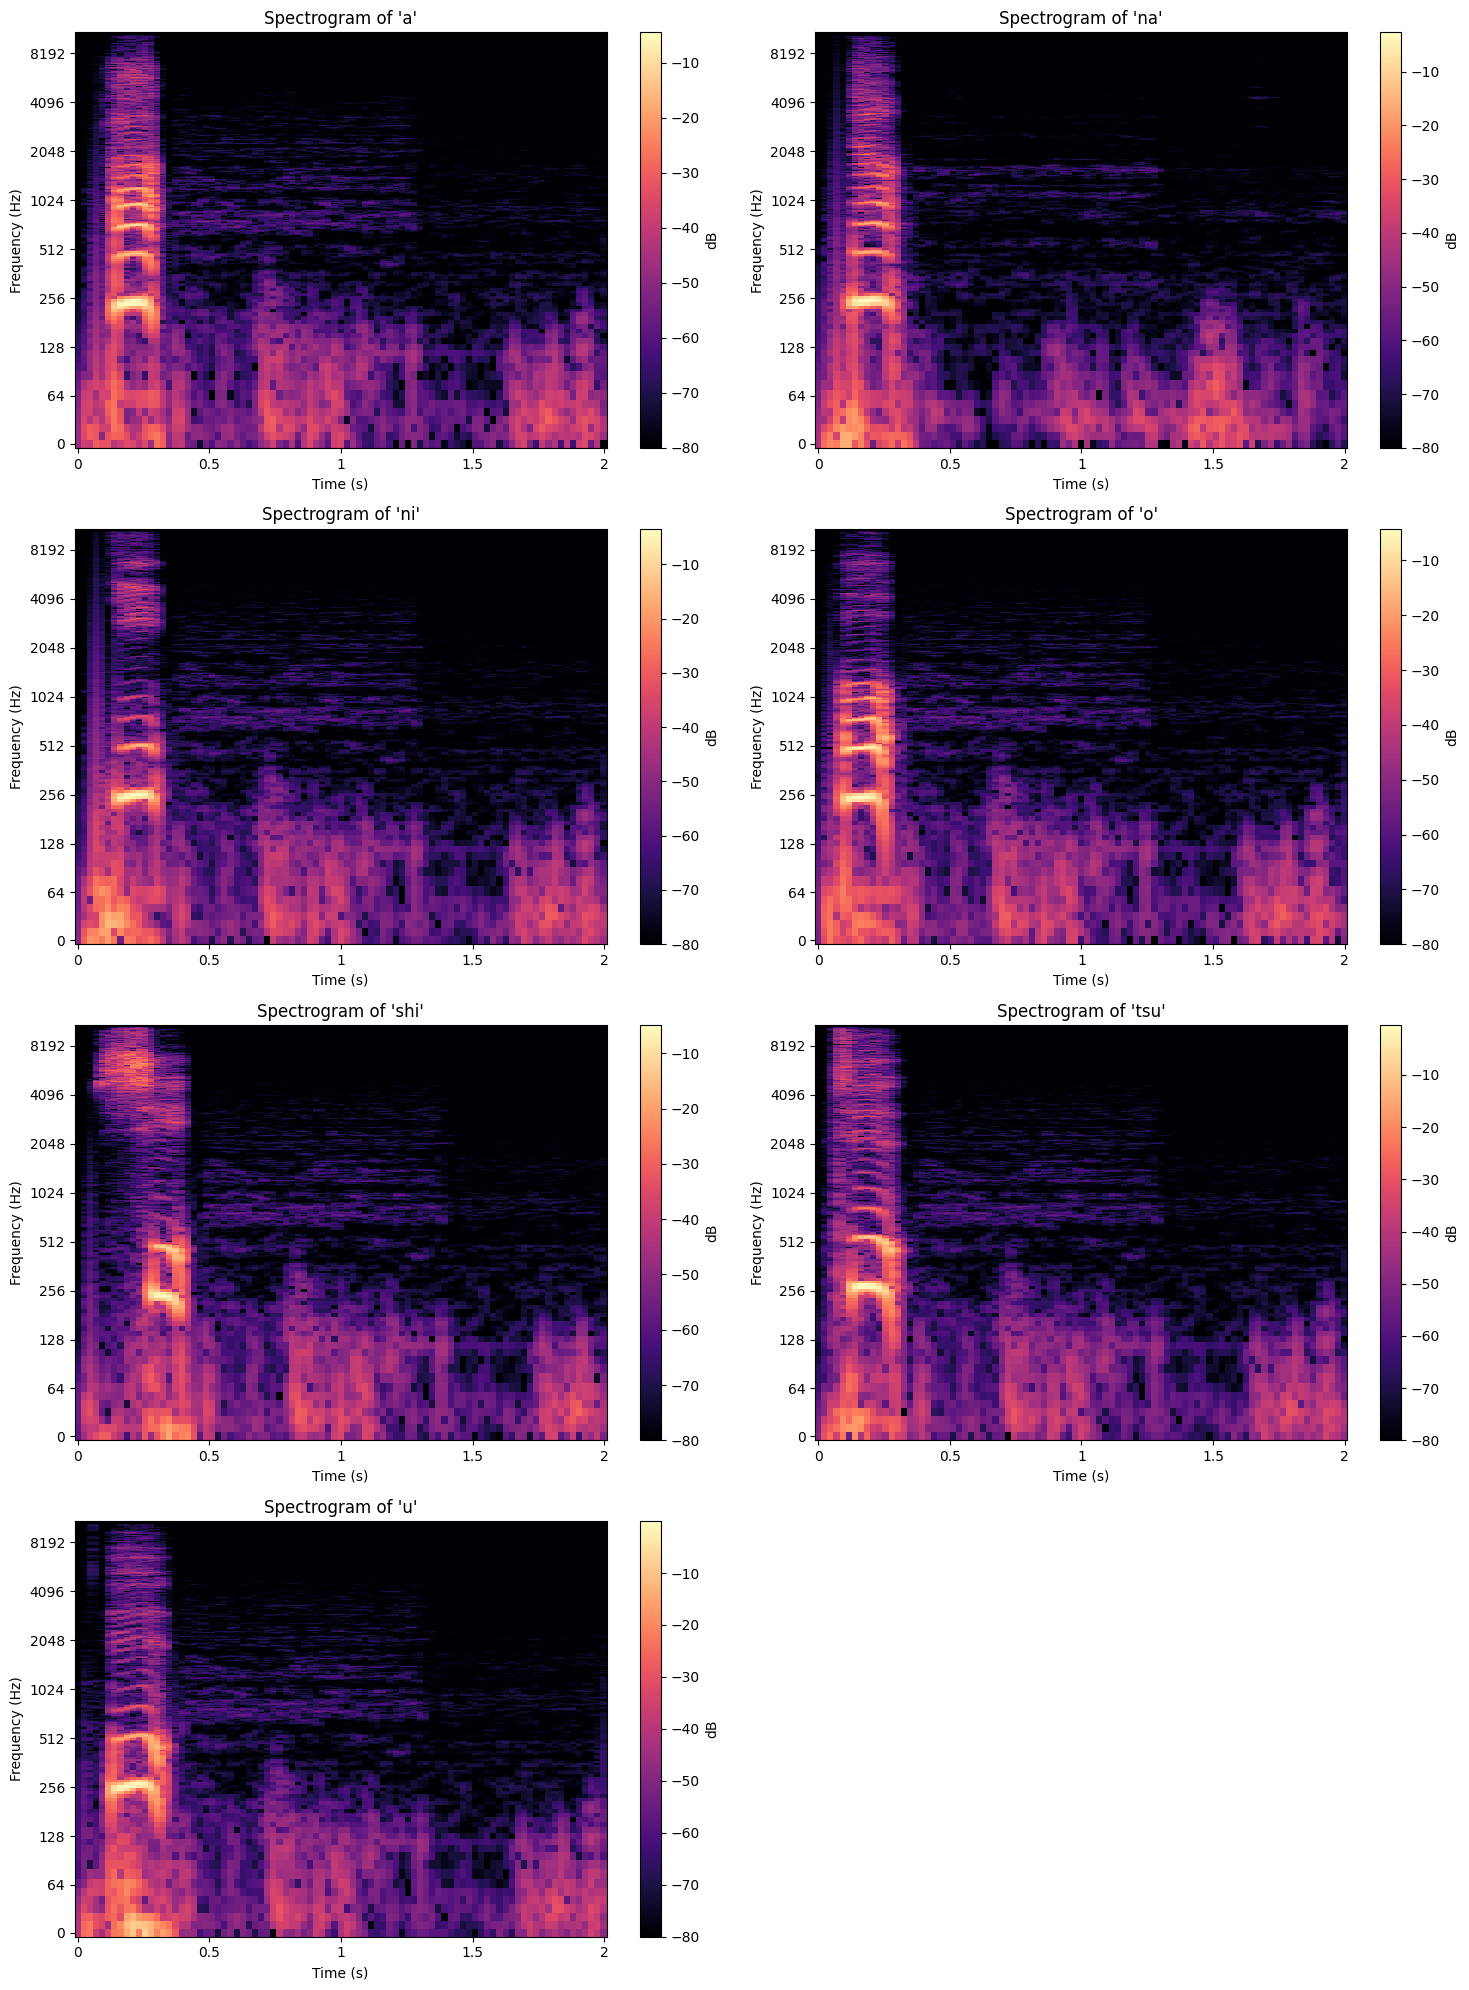

In [18]:
# Plot the Spectrogram

fig, axs = plt.subplots(4,2, figsize = (15,20))
fig.delaxes(axs[3,1])
for i in range(0,len(phoneme_name)):
    img = librosa.display.specshow(S_db[i], sr=phoneme_list[i][1], x_axis='time', y_axis='log', ax = axs[int(i/2),i%2])
    axs[int(i/2),i%2].set_title("Spectrogram of '" + str(phoneme_name[i])+ "'")
    axs[int(i/2),i%2].set_xlabel("Time (s)")
    axs[int(i/2),i%2].set_ylabel("Frequency (Hz)")
    color_bar = plt.colorbar(img, ax=axs[int(i/2),i%2])
    color_bar.set_label('dB')
plt.tight_layout()
plt.show();